In [1]:
# 면적 그래프는 각 열의 데이터를 선 그래프로 구현하는데, 선 그래프와 x 축 사이에 공간에 색이 입혀진다
# 선 그래프를 그리는 plot() 메소드에 kind = 'area' 옵션을 추가하면 면적 그래프를 간단하게 그릴 수 있다

C:\Users\mpm51\AppData\Local\Temp\ipykernel_33200\3704086483.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.drop(['전출지별'], axis=1, inplace=True)
C:\Users\mpm51\AppData\Local\Temp\ipykernel_33200\3704086483.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)


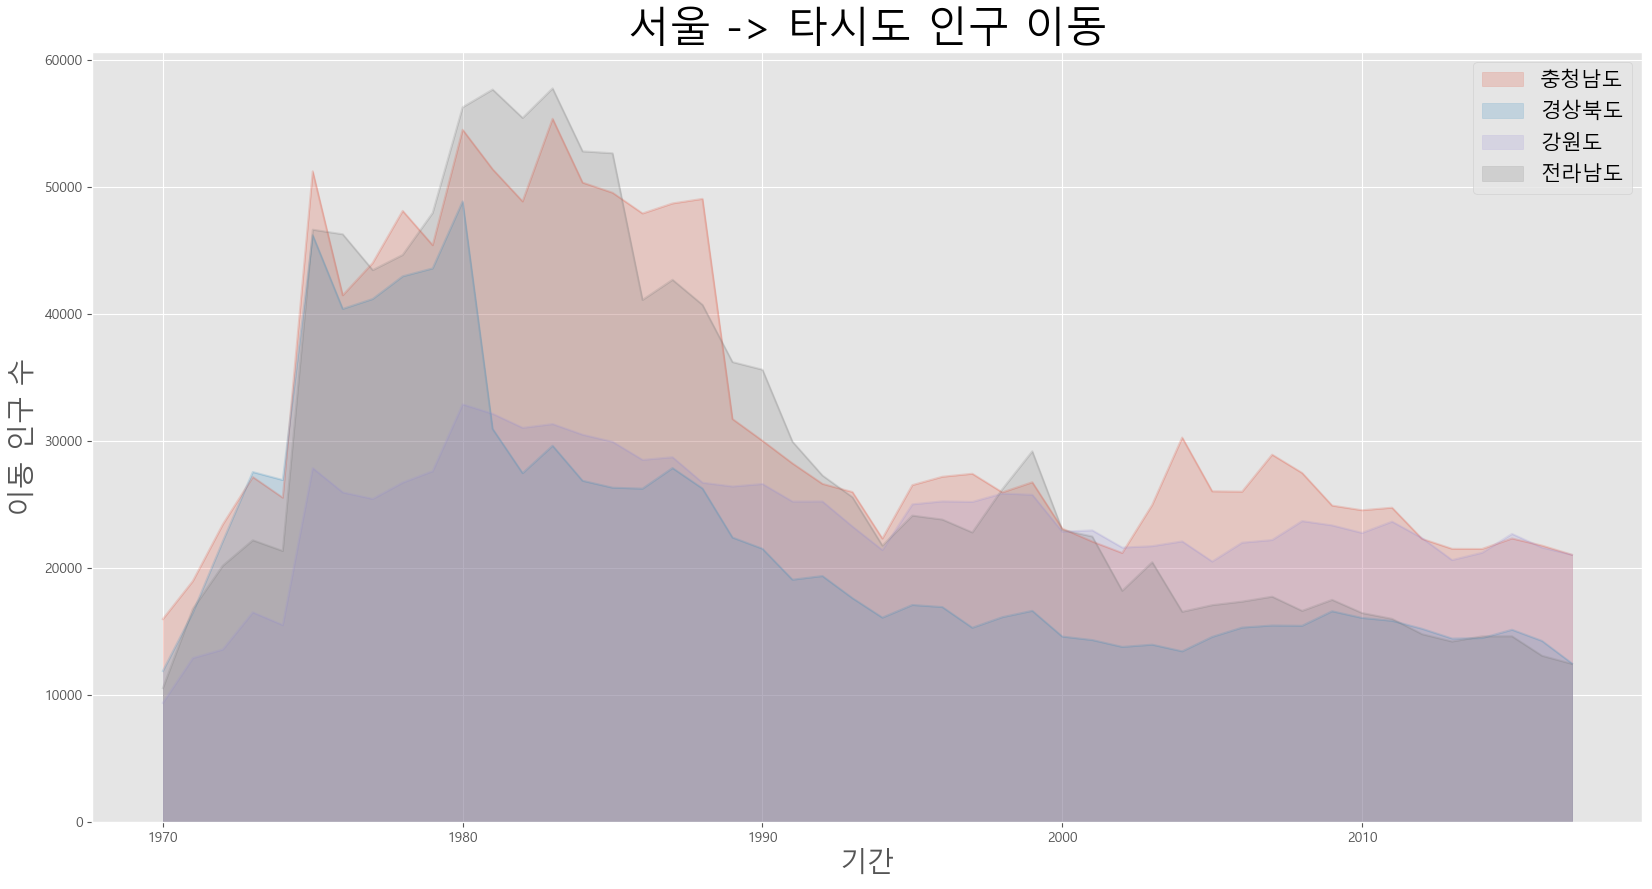

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_path = './data/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

df = df.ffill()

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul.drop(['전출지별'], axis=1, inplace=True)
df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데인터 값만 선택
sr_one = df_seoul.loc['경기도']

## 서울에서 '충청남도','경상북도','강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'], col_years]

## 인구 수 데이터를 문자열에서 정수형으로 변환
df_4 = df_4.astype(int)
df_4

## plot() 메소드는 데이터프레임의 행 인덱스를 x축에 배치하고 각 열의 데이터를 독립적인 그래프로 표시
## 연도별 인구 이동의 변화를 그리기 위해서는 연도를 x축에 위치시켜야하고, 현재의 데이터프레임 구조를 그대로 사용할 수 없다
## 따라서 데이터프레임을 전환하여 행 인덱스에 연도, 열 이름에 네 곳의 전입지를 나타내는 구조로 변환한다

df_4 = df_4.transpose()
df_4.head(7)

plt.style.use('ggplot')

## 면적 그래프 그리기 # alpha 는 투명도, stacked는 누적되지 않고 서로 겹치도록 표시되어 선 그래프를 동일한 화면에 여러개
# 그린 것 처럼 표시됨
df_4.plot(kind = 'area', stacked = False, alpha = 0.2, figsize = (20,10))

plt.title('서울 -> 타시도 인구 이동', size = 30)
plt.ylabel('이동 인구 수', size = 20)
plt.xlabel('기간', size = 20)
plt.legend(loc = 'best', fontsize = 15)

plt.show()

In [ ]:
# 면적 그래프 stacked = True

C:\Users\mpm51\AppData\Local\Temp\ipykernel_33200\2996878672.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.drop(['전출지별'], axis=1, inplace=True)
C:\Users\mpm51\AppData\Local\Temp\ipykernel_33200\2996878672.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)


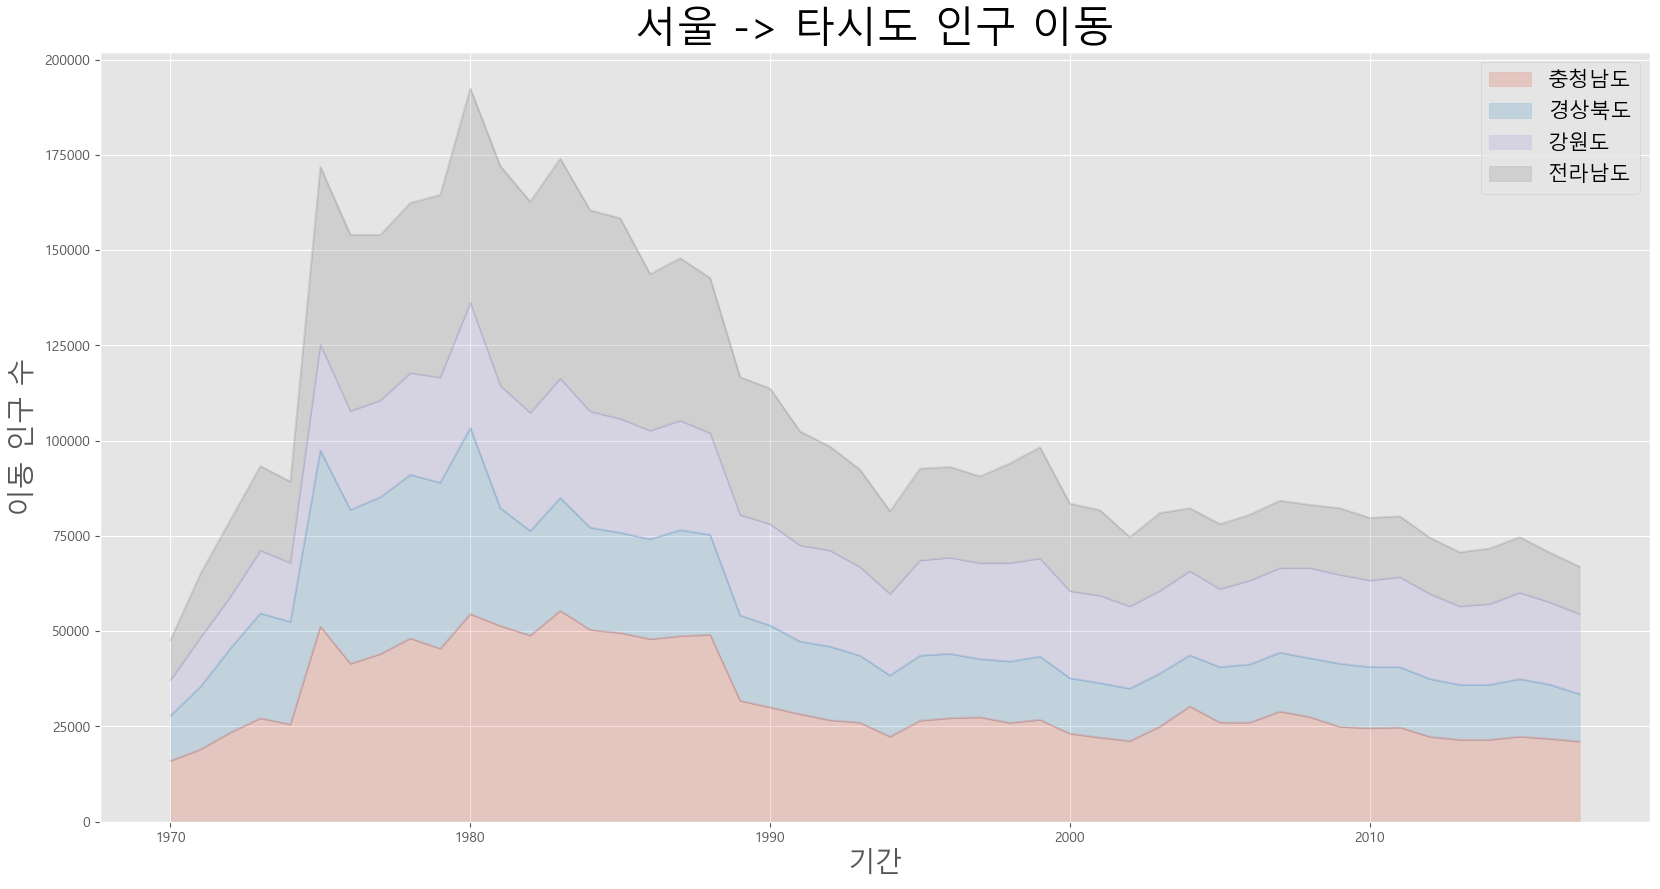

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_path = './data/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

df = df.ffill()

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul.drop(['전출지별'], axis=1, inplace=True)
df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데인터 값만 선택
sr_one = df_seoul.loc['경기도']

## 서울에서 '충청남도','경상북도','강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'], col_years]

## 인구 수 데이터를 문자열에서 정수형으로 변환
df_4 = df_4.astype(int)

## plot() 메소드는 데이터프레임의 행 인덱스를 x축에 배치하고 각 열의 데이터를 독립적인 그래프로 표시
## 연도별 인구 이동의 변화를 그리기 위해서는 연도를 x축에 위치시켜야하고, 현재의 데이터프레임 구조를 그대로 사용할 수 없다
## 따라서 데이터프레임을 전환하여 행 인덱스에 연도, 열 이름에 네 곳의 전입지를 나타내는 구조로 변환한다

df_4 = df_4.transpose()

plt.style.use('ggplot')

## 면적 그래프 그리기 # alpha 는 투명도, stacked는 누적되지 않고 서로 겹치도록 표시되어 선 그래프를 동일한 화면에 여러개
# 그린 것 처럼 표시됨
df_4.plot(kind = 'area', stacked = True, alpha = 0.2, figsize = (20,10))

plt.title('서울 -> 타시도 인구 이동', size = 30)
plt.ylabel('이동 인구 수', size = 20)
plt.xlabel('기간', size = 20)
plt.legend(loc = 'best', fontsize = 15)

plt.show()

In [ ]:
# 4-15 axes 객체 속성 변경하기

C:\Users\mpm51\AppData\Local\Temp\ipykernel_33200\2514010191.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.drop(['전출지별'], axis=1, inplace=True)
C:\Users\mpm51\AppData\Local\Temp\ipykernel_33200\2514010191.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)


<class 'matplotlib.axes._axes.Axes'>


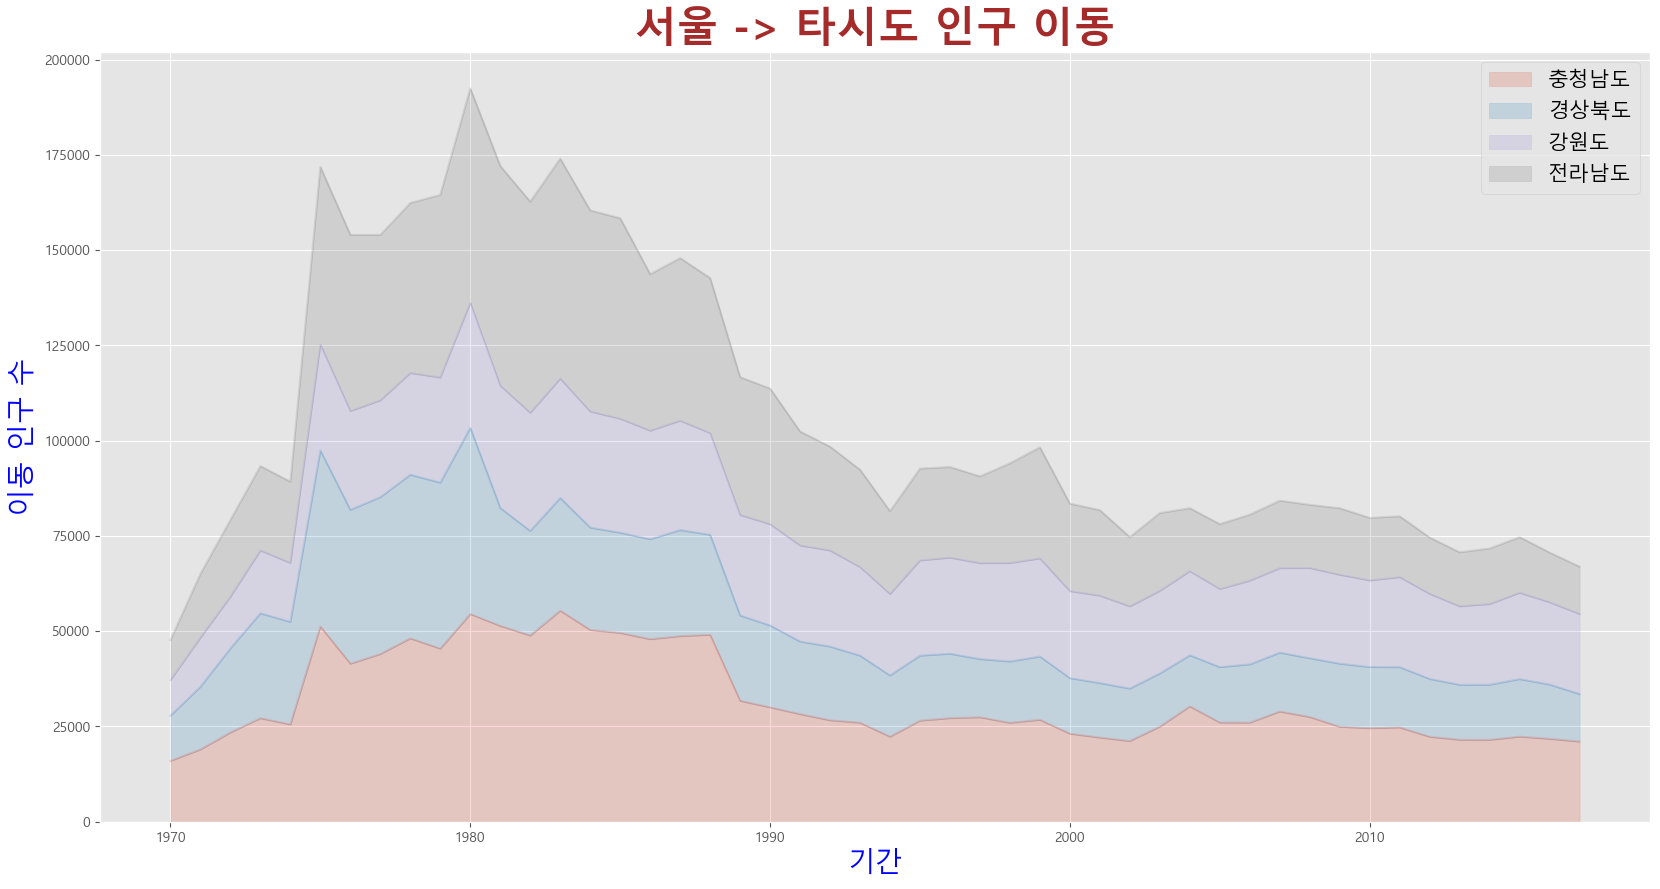

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_path = './data/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

df = df.ffill()

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul.drop(['전출지별'], axis=1, inplace=True)
df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데인터 값만 선택
sr_one = df_seoul.loc['경기도']

## 서울에서 '충청남도','경상북도','강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'], col_years]

## 인구 수 데이터를 문자열에서 정수형으로 변환
df_4 = df_4.astype(int)

## plot() 메소드는 데이터프레임의 행 인덱스를 x축에 배치하고 각 열의 데이터를 독립적인 그래프로 표시
## 연도별 인구 이동의 변화를 그리기 위해서는 연도를 x축에 위치시켜야하고, 현재의 데이터프레임 구조를 그대로 사용할 수 없다
## 따라서 데이터프레임을 전환하여 행 인덱스에 연도, 열 이름에 네 곳의 전입지를 나타내는 구조로 변환한다

df_4 = df_4.transpose()

plt.style.use('ggplot')

## 면적 그래프 그리기 # alpha 는 투명도, stacked는 누적되지 않고 서로 겹치도록 표시되어 선 그래프를 동일한 화면에 여러개
# 그린 것 처럼 표시됨
## 면적 그래프 axe 객체 생성
ax = df_4.plot(kind = 'area', stacked = True, alpha = 0.2, figsize = (20,10))
print(type(ax))

plt.title('서울 -> 타시도 인구 이동', size = 30, color = 'brown', weight = 'bold')
plt.ylabel('이동 인구 수', size = 20, color = 'blue')
plt.xlabel('기간', size = 20, color = 'blue')
plt.legend(loc = 'best', fontsize = 15)

plt.show()

In [17]:
# 에제 4-14 에서는 df_4.plot() 메소드로 만든 그래프를 pyplot 모듈이 자동으로 객체를 관리하였지만
# 4-15 에서는 df_4.plot() 메소드로 생성한 그래프 객체를 ax변수에 저장하여 사용자가 직접 관리
# 여기서 plot() 메소드로 생성한 그래프는 Axes 객체이므로, 4-11 에서 살펴본 Axes 객체를 꾸미는 메소드를 사용하여
# Axes 객체의 세부적인 요소를 설정해야함